# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [11]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [23]:
df['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [22]:
avg = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()

mich = avg.loc['MICHIGAN']
ohio = avg.loc['OHIO']

if mich > ohio:
    print('Michigan')
elif mich < ohio:
    print('Ohio')
else:
    print('Same for both')

Ohio


Find the average for your chosen test across all states in 2019

In [21]:
avg_year = df.groupby('YEAR')['AVG_MATH_8_SCORE'].mean()

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [20]:
maximum = df.groupby('STATE')['AVG_MATH_8_SCORE'].max() 

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [27]:
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['expenditure_per_student'].fillna(df['expenditure_per_student'].mean(), inplace=True)

df['federal_revenue_proportion'] = df['FEDERAL_REVENUE'] / df['TOTAL_REVENUE']
df['federal_revenue_proportion'].fillna(df['federal_revenue_proportion'].mean(), inplace=True)

df['instruction_expenditure_proportion'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df['instruction_expenditure_proportion'].fillna(df['instruction_expenditure_proportion'].mean(), inplace=True)

Feature engineering justification: I created three features in the code above. The first one is expenditure_per_student, which is the total expenditure per student. The second is federal_revenue_proportion, which is the proportion of total revenue that comes from the federal government. Last is instruction_expenditure_proportion, which is the proportion of total expenditure spent on instruction. It also fills any NaN values in these new columns with the mean of the column.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

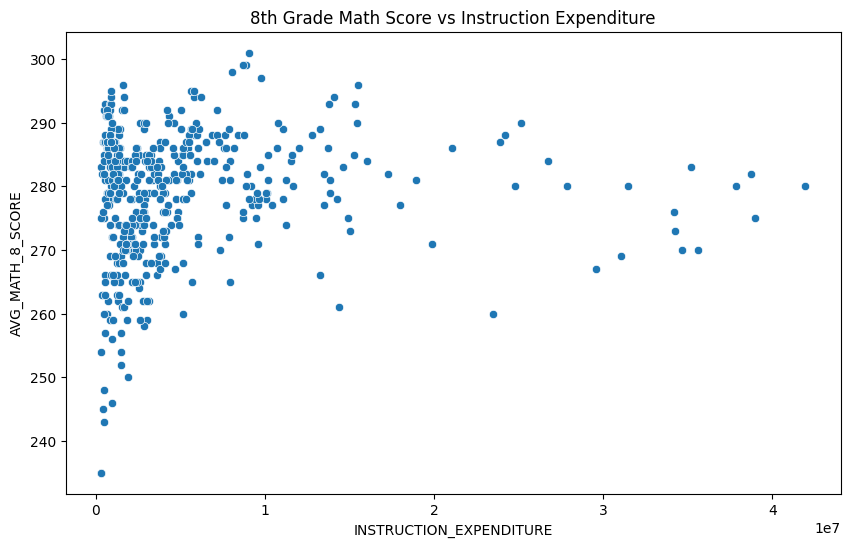

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_8_SCORE')
plt.title('8th Grade Math Score vs Instruction Expenditure')
plt.show()

This scatter plot visualizes the relationship between the instruction expenditure and the average 8th grade math score. Each point represents a state-year pair, with the x-coordinate representing the instruction expenditure and the y-coordinate representing the average 8th grade math score.

**Visualization 2**

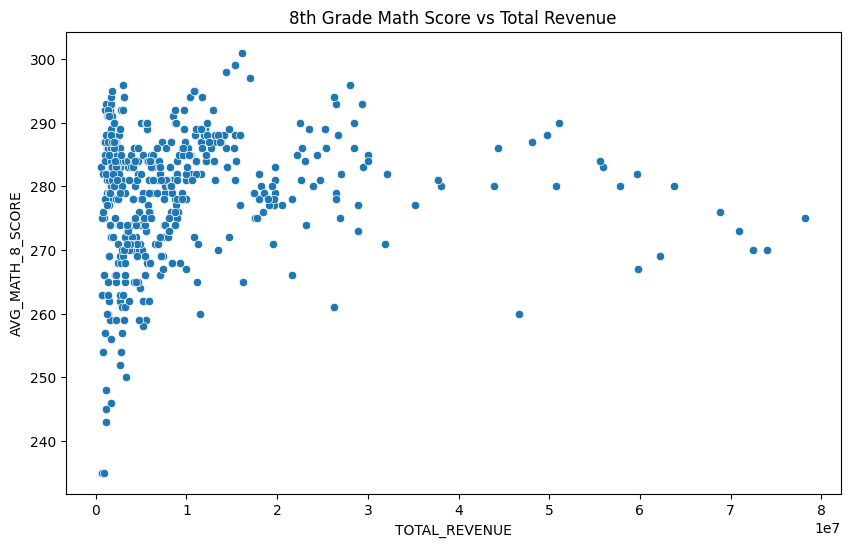

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TOTAL_REVENUE', y='AVG_MATH_8_SCORE')
plt.title('8th Grade Math Score vs Total Revenue')
plt.show()

This scatter plot shows the relationship between the total revenue and the average 8th grade math score. Each point represents a state-year pair, with the x-coordinate representing the total revenue and the y-coordinate representing the average 8th grade math score. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [37]:
from sklearn.model_selection import train_test_split

In [60]:
df = df.dropna()
X = df[['INSTRUCTION_EXPENDITURE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']]
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [61]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [43]:
from sklearn.linear_model import LinearRegression

In [62]:
# create your model here
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [71]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
print(model.score(X_test, y_test))

# mean error
print(np.mean(model.predict(X_test)-y_test))

# mean absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))

# root mean squared error -- penalizes large errors
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.8739174497942788
0.43630789112854546
2.084554858427862
2.4544940801883484


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

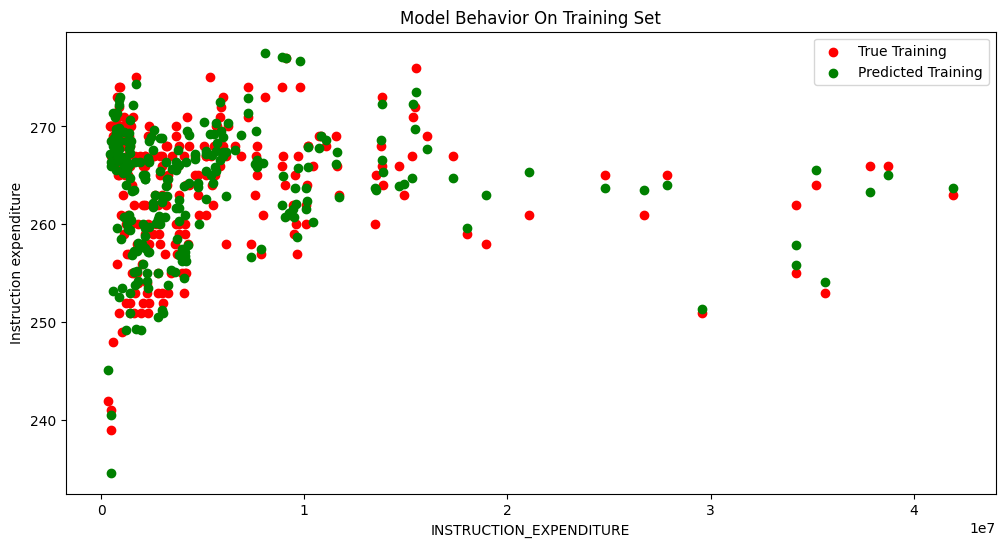

In [67]:
col_name = 'INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Instruction expenditure')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

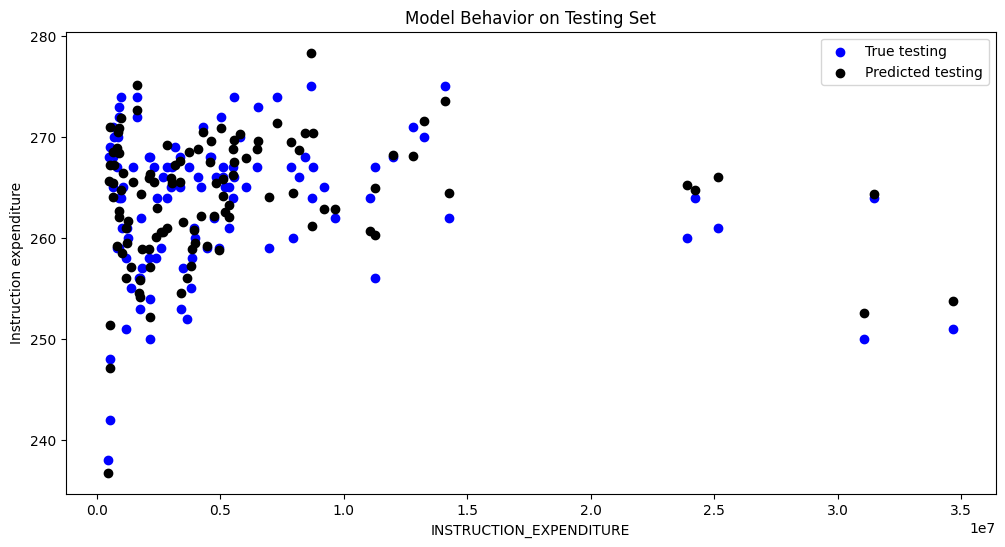

In [70]:
col_name = 'INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Instruction expenditure')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Based on the metrics calculated, my linear regression model seemed to perform well on the test data. The R² value of approx. 0.87 indicates that about 87% of the variance in the target variable can be explained by the features in your model, which is a strong result. The mean error of approx. 0.44 suggests that, on average, the model’s predictions are close to the actual values. The mean absolute error of approx. 2.08 and the root mean squared error of approx. 2.45 further confirm the model’s accuracy, as these values are relatively low, indicating that the model’s predictions are generally close to the actual values.

The scatter plots gives a visual representation of the model’s performance. The first plot shows the relationship between the ‘INSTRUCTION_EXPENDITURE’ feature and the target variable in the training set, both for the actual values (in red) and the model’s predictions (in green). Similarly, the second plot shows this relationship in the test set, with the actual values in blue and the model’s predictions in black. These plots help us understand how changes in ‘INSTRUCTION_EXPENDITURE’ affect the model’s predictions and how well the model’s predictions align with the actual values.